In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_Anaheim_multi_class

In [2]:
numNodes = Compute_Jacobian_Anaheim_multi_class.numNodes;
numLinks = Compute_Jacobian_Anaheim_multi_class.numLinks;
numODpairs = Compute_Jacobian_Anaheim_multi_class.numODpairs;
numZones = Compute_Jacobian_Anaheim_multi_class.numZones;
od_pairs = Compute_Jacobian_Anaheim_multi_class.od_pairs;
link_list_js = Compute_Jacobian_Anaheim_multi_class.link_list_js;
link_length_list = Compute_Jacobian_Anaheim_multi_class.link_length_list;

In [3]:
include("../Julia_files/initia_data.jl");
include("prepare_data_Anaheim.jl");
include("extract_data_Anaheim.jl");
include("../Julia_files/tap_MSA_multi_class.jl");
include("../Julia_files/inverseVI_multi_class.jl");
include("../Julia_files/demands_adjustment_gradi_multi_class.jl");

In [4]:
demandsDictCar[0] = demandsDict[0]["car"]
demandsDictCar[1] = demandsDict[1]["car"]
demandsDictTruck[0] = demandsDict[0]["truck"]
demandsDictTruck[1] = demandsDict[1]["truck"]

Dict{Any,Any} with 1444 entries:
  (8,23)  => 0.17837191692988272
  (21,13) => 4.874432146850246
  (23,10) => 2.2003272227167816
  (30,38) => 21.05844006980347
  (9,34)  => 8.32356374115274
  (12,27) => 0.4306120516563847
  (27,32) => 1.8357151416507786
  (4,5)   => 122.96519302188278
  (18,21) => 13.075269059005425
  (30,21) => 17.752931421794386
  (36,35) => 2.5500058361318647
  (37,37) => 0
  (11,32) => 0.9418658527955416
  (1,33)  => 15.667482716180444
  (3,38)  => 21.204201799803236
  (6,18)  => 29.243586737948775
  (36,8)  => 0.20748381045529812
  (1,22)  => 12.733862718607542
  (24,31) => 2.3899107650623157
  (19,26) => 0.684417741413637
  (36,4)  => 12.266192669041713
  (36,25) => 13.630598081549184
  (33,33) => 0
  (13,19) => 0.2080405816547712
  (7,19)  => 15.147677785092354
  ⋮       => ⋮

In [5]:
demandsDiffDictCar[1] = norm(demandsDicToVec(demandsDictCar[1]) - demandsDicToVec(demandsDictCar[0]))/
norm(demandsDicToVec(demandsDictCar[0]));

demandsDiffDictTruck[1] = norm(demandsDicToVec(demandsDictTruck[1]) - demandsDicToVec(demandsDictTruck[0]))/
norm(demandsDicToVec(demandsDictTruck[0] ));

In [6]:
demandsVecDictCar[0] = demandsDicToVec(demandsDictCar[0]);
demandsVecDictTruck[0] = demandsDicToVec(demandsDictTruck[0]);

In [7]:
demandsVecDictCar

Dict{Any,Any} with 1 entry:
  0 => [1092.72,325.92,689.12,283.52,436.08000000000004,345.20000000000005,0.8,…

In [8]:
demandsVecDictTruck

Dict{Any,Any} with 1 entry:
  0 => [273.18,81.48,172.28,70.88,109.02000000000001,86.30000000000001,0.2,11.3…

In [9]:
fcoeffs = [1, 0, 0, 0, .15];

# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA_Multi(demandsDictCar[0], demandsDictTruck[0], fcoeffs);

In [10]:
tapFlowDicDict[0]

Dict{Any,Any} with 2 entries:
  "car"   => [(71,255)=>1695.5365600000002,(323,324)=>883.19568,(354,353)=>0.0,…
  "truck" => [(71,255)=>426.62784000000005,(323,324)=>221.1859800000003,(354,35…

In [11]:
tapFlowVecDict[0]

2x914 Array{Float64,2}:
 5659.92  7730.0  6135.2  9739.04  2069.44  …  956.96  919.44  310.32  1218.0
 1414.98  1932.5  1533.8  2434.76   517.36     239.24  229.86   77.58   304.5

In [12]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/Anaheim_net.txt", tapFlowDicDict[0]);

In [13]:
arcsDict[0]

Dict{(Int64,Int64),Arc} with 914 entries:
  (71,255)  => Arc(71,255,1800.0,0.5,2548.79224,1695.5365600000002,426.62784000…
  (323,324) => Arc(323,324,5400.0,0.5,1325.5676400000007,883.19568,221.18598000…
  (354,353) => Arc(354,353,5400.0,1.0,0.1990000000000009,0.0,0.0995000000000004…
  (60,230)  => Arc(60,230,9000.0,0.333333333,2547.60044,1697.6735199999996,424.…
  (223,346) => Arc(223,346,1800.0,0.5,1678.6634399999998,1118.6152800000002,280…
  (147,146) => Arc(147,146,7200.0,0.763320942,4091.8614800000005,2733.450239999…
  (337,33)  => Arc(337,33,12600.0,0.149068323,7126.0949599999985,4721.313920000…
  (366,365) => Arc(366,365,5400.0,0.5,1231.0842400000001,820.7274400000002,205.…
  (390,375) => Arc(390,375,5400.0,2.0,0.023760000000000014,0.023760000000000014…
  (315,316) => Arc(315,316,5400.0,2.579924242,0.0,0.0,0.0)
  (198,197) => Arc(198,197,7200.0,0.152622883,7068.748360000003,4611.4072000000…
  (333,334) => Arc(333,334,5400.0,0.420075758,1762.5351199999996,1175.208479999…
  (367,3

In [14]:
deg = 6
c = 1.5
lam = 0.1

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDictCar[1], demandsDictTruck[1], 
arcsDict[0]);

INFO: Loading help data...


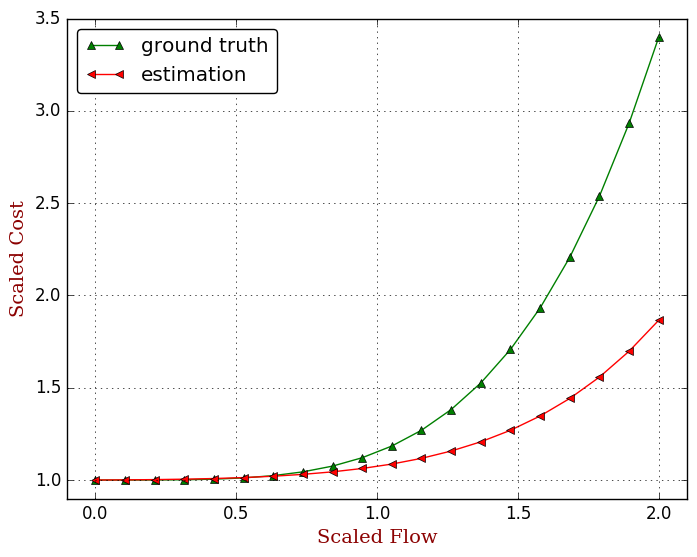

In [15]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "^-g", label="ground truth")
plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Anaheim_iter_$(iterN)_multi_class.pdf")

In [16]:
demandsVecDictCar[1] = demandsDicToVec(demandsDictCar[1]);
demandsVecDictTruck[1] = demandsDicToVec(demandsDictTruck[1]);

objFunDict[1] = objF(demandsVecDictCar[1], demandsVecDictTruck[1], coeffs_dict[(deg, c, lam, 1)]);

In [17]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA_Multi(demandsDictCar[1], demandsDictTruck[1], 
coeffs_dict[(deg, c, lam, 1)]);

In [18]:
tapFlowDicDict[1]

Dict{Any,Any} with 2 entries:
  "car"   => [(71,255)=>1829.887609967578,(323,324)=>860.0330847982641,(354,353)…
  "truck" => [(71,255)=>457.4639708111456,(323,324)=>214.98752455910943,(354,353…

In [19]:
tapFlowVecDict[1] 

2x914 Array{Float64,2}:
 5514.24  7628.36  5933.11  10477.2   …  951.887  304.741   1235.06 
 1378.56  1907.09  1483.28   2619.31     237.972   76.1851   308.766

In [20]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/Anaheim_net.txt", tapFlowDicDict[1]);

In [21]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], coeffs_dict[(deg, c, lam, 1)]);

In [22]:
linkCostDicDict[1]["car"]

Dict{Any,Any} with 914 entries:
  "1"   => 1.2655392409574382
  "519" => 0.42020523238815766
  "788" => 1.0
  "774" => 1.4213928940130776
  "599" => 1.7269040407205818
  "491" => 0.5017563374979941
  "228" => 0.5007930761392703
  "332" => 0.43236733240277836
  "190" => 0.5000025814909205
  "227" => 0.2854194811421366
  "297" => 0.16348286095661071
  "605" => 1.0811431715923836
  "24"  => 1.003783243194879
  "204" => 0.5486117923489809
  "416" => 1.9201441757003426
  "23"  => 1.0009964894171892
  "160" => 0.3342697862442564
  "561" => 0.5
  "859" => 0.5010052831327142
  "891" => 1.1205525755349621
  "815" => 1.0015563944263093
  "253" => 0.2905578846999418
  "39"  => 0.15311585591739685
  "843" => 0.14982375069960707
  "112" => 1.4675225811447978
  ⋮      => ⋮

In [23]:
linkCostDicDict[1]["truck"]

Dict{Any,Any} with 914 entries:
  "1"   => 1.392093165053182
  "519" => 0.46222575562697343
  "788" => 1.1
  "774" => 1.5635321834143854
  "599" => 1.89959444479264
  "491" => 0.5519319712477936
  "228" => 0.5508723837531974
  "332" => 0.47560406564305624
  "190" => 0.5500028396400126
  "227" => 0.3139614292563503
  "297" => 0.1798311470522718
  "605" => 1.189257488751622
  "24"  => 1.104161567514367
  "204" => 0.6034729715838791
  "416" => 2.112158593270377
  "23"  => 1.1010961383589082
  "160" => 0.3676967648686821
  "561" => 0.55
  "859" => 0.5511058114459857
  "891" => 1.2326078330884584
  "815" => 1.1017120338689403
  "253" => 0.319613673169936
  "39"  => 0.16842744150913655
  "843" => 0.1648061257695678
  "112" => 1.6142748392592778
  ⋮      => ⋮

In [24]:
link_length_list

914-element Array{Any,1}:
 5280.0
 5280.0
 5280.0
 5280.0
 5280.0
 5280.0
 5280.0
 2640.0
 2640.0
 2640.0
 2640.0
 2640.0
 2640.0
    ⋮  
 2640.0
 5280.0
 2640.0
 5280.0
 2640.0
 5280.0
 2640.0
 5280.0
 2640.0
 5280.0
 2640.0
 5280.0

In [25]:
link_length_list_car = [linkCostDicDict[1]["car"]["$(i)"] for i=0:numLinks-1]
link_length_list_truck = [linkCostDicDict[1]["truck"]["$(i)"] for i=0:numLinks-1]

link_length_list_dict[0] = link_length_list_car
link_length_list_dict[1] = link_length_list_truck

link_length_list_dict_dict[1] = link_length_list_dict

Dict{Any,Any} with 2 entries:
  0 => {1.1528212998252976,1.2655392409574382,1.1681886057380426,1.6439021970215…
  1 => {1.2681034298078275,1.392093165053182,1.285007466311847,1.808292416723737…

In [26]:
jacobiSpiessDict[1] = Compute_Jacobian_Anaheim_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
link_list_js, link_length_list_dict_dict[1]);

In [27]:
jacobiSpiessDict[1]

1406x914x2 Array{Float64,3}:
[:, :, 1] =
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.

In [28]:
# maximum number of iterations
N = 50;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [29]:
for iterNumber = 1:N
    
    l = iterNumber;
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);
    
    demandsVecDictCar[l] = demandsDicToVec(demandsDictCar[l]);
    demandsVecDictTruck[l] = demandsDicToVec(demandsDictTruck[l]);

    searchDirecDict[l] = searchDirec(demandsVecDictCar[l], demandsVecDictTruck[l], descDirecDict[l], epsilon_1);
    
    thetaMaxDict[l] = thetaMax(demandsVecDictCar[l], demandsVecDictTruck[l], searchDirecDict[l]);
    
    demandsVecDictCar[l+1] = similar(demandsVecDictCar[0]);
    demandsVecDictTruck[l+1] = similar(demandsVecDictTruck[0]);
    
    demandsVecDictCar[l+1], demandsVecDictTruck[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDictCar[l], 
    demandsVecDictTruck[l], coeffs_dict[(deg, c, lam, l)], searchDirecDict[l], thetaMaxDict[l], rho, M);
        
    demandsDictCar[l+1] = demandsVecToDic(demandsVecDictCar[l+1]);
    demandsDictTruck[l+1] = demandsVecToDic(demandsVecDictTruck[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA_Multi(demandsDictCar[l+1], demandsDictTruck[l+1], 
    coeffs_dict[(deg, c, lam, l)]);
        
    arcsDict[l+1] = observFlow("./benchmark_data/Anaheim_net.txt", tapFlowDicDict[l+1]);
        
    coeffs_dict[(deg, c, lam, l+1)], objInvVIDict[l+1] = train(lam, deg, c, demandsDictCar[l+1], 
    demandsDictTruck[l+1], arcsDict[0]);
    
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], coeffs_dict[(deg, c, lam, l+1)]);
        
    #######################################
    link_length_list_dict[0] = [linkCostDicDict[l+1]["car"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict[1] = [linkCostDicDict[l+1]["truck"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict_dict[l+1] = link_length_list_dict
    #######################################
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_Anaheim_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, 
    od_pairs, link_list_js, link_length_list_dict_dict[l+1]);
        
    demandsDiffDictCar[l+1] = norm(demandsVecDictCar[l+1] - demandsVecDictCar[0]) / norm(demandsVecDictCar[0]);
    demandsDiffDictTruck[l+1] = norm(demandsVecDictTruck[l+1] - demandsVecDictTruck[0]) / 
    norm(demandsVecDictTruck[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
        
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [30]:
demandsVecDictCar

Dict{Any,Any} with 8 entries:
  0 => [1092.72,325.92,689.12,283.52,436.08000000000004,345.20000000000005,0.8,4…
  4 => [931.2600121511596,289.1148909792363,590.1838955141234,328.0499098563758,…
  7 => [931.2599948975069,289.11490134239267,590.1839136381269,328.0498953950921…
  2 => [931.26584987463,289.11142516062176,590.1776801005045,328.0547602699149,4…
  3 => [931.26584987463,289.11142516062176,590.1776801005045,328.0547602699149,4…
  5 => [931.2600006657754,289.1148977427089,590.1839079371197,328.0499005694997,…
  6 => [931.2599948975069,289.11490134239267,590.1839136381269,328.0498953950921…
  1 => [931.3930757148678,289.17533076700187,589.8435932028227,328.157270180555,…

In [31]:
demandsVecDictTruck

Dict{Any,Any} with 8 entries:
  0 => [273.18,81.48,172.28,70.88,109.02000000000001,86.30000000000001,0.2,11.36…
  4 => [232.8177668408627,72.28198445686608,147.49482817691666,81.94650822200042…
  7 => [232.81776223850957,72.28198678264633,147.49483429547718,81.9465066230936…
  2 => [232.81932594230375,72.28122441447094,147.49283125884295,81.9471716751704…
  3 => [232.81932594230375,72.28122441447094,147.49283125884295,81.9471716751704…
  5 => [232.81776375824955,72.28198600200135,147.49483204148677,81.9465068381037…
  6 => [232.81776223850957,72.28198678264633,147.49483429547718,81.9465066230936…
  1 => [232.84826892871695,72.29383269175047,147.46089830070568,82.0393175451387…

In [32]:
norObjFunDict

Dict{Any,Any} with 7 entries:
  7 => 0.5572585569435465
  4 => 0.5757027852839633
  2 => 0.9700076235813602
  3 => 0.5772531588225855
  5 => 0.5644361269005892
  6 => 0.5572585569435465
  1 => 1.0

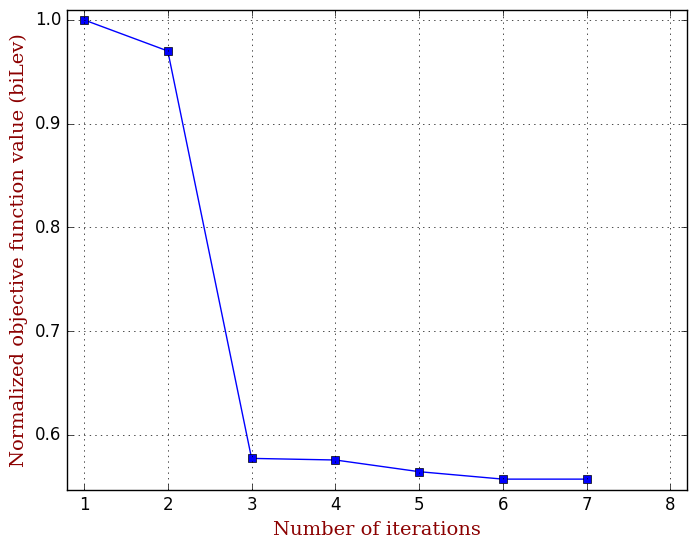

In [33]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_Anaheim.pdf")

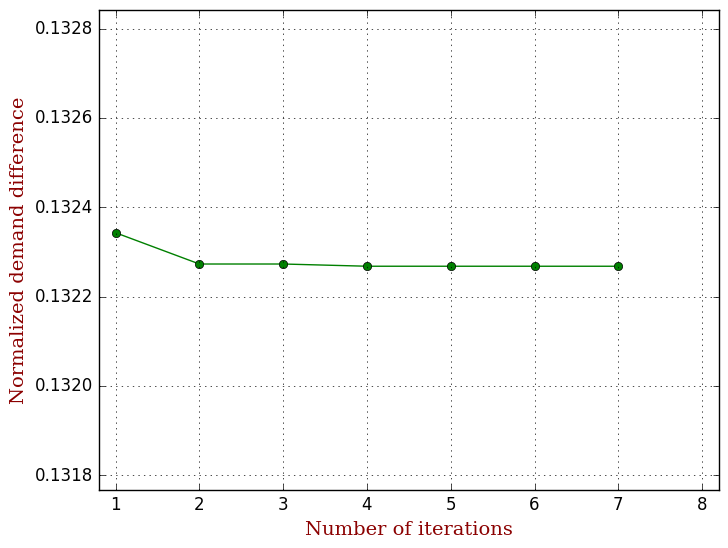

In [34]:
using PyPlot

iterNum = 1:(length(demandsDiffDictCar))

demandsDiff = map(iterNum->demandsDiffDictCar[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictCar) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Anaheim_car.pdf")

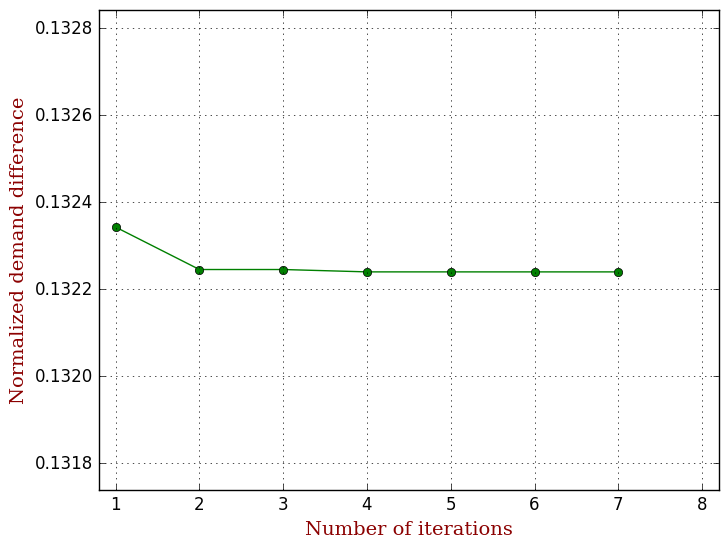

In [35]:
using PyPlot

iterNum = 1:(length(demandsDiffDictTruck))

demandsDiff = map(iterNum->demandsDiffDictTruck[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictTruck) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Anaheim_truck.pdf")

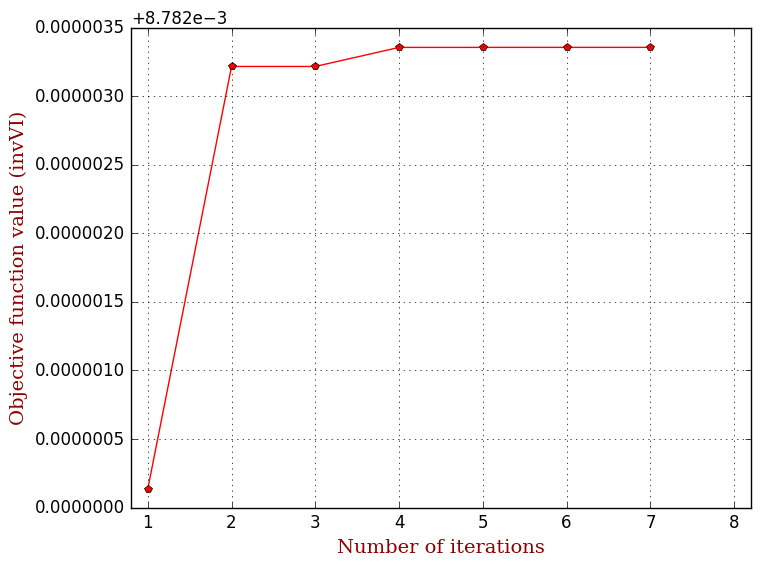

In [36]:
using PyPlot

iterNum = 1:(length(objInvVIDict))

objFun = map(iterNum->objInvVIDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "p-r")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0.8, length(objInvVIDict) + 1 + .2)
# ylim(0.9, 2.0)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value (invVI)", fontdict=font1)

savefig("./results/objFun_invVI_Anaheim.pdf")

In [37]:
coeffs_dict

Dict{Any,Any} with 7 entries:
  (6,1.5,0.1,2) => [1.0,0.008186835387453009,0.024573536047607605,0.033048196244…
  (6,1.5,0.1,1) => [1.0,0.006232994272378879,0.01792820310739348,0.0235785453557…
  (6,1.5,0.1,5) => [1.0,0.00820026040146216,0.024803153355681673,0.0334223176832…
  (6,1.5,0.1,3) => [1.0,0.008186882382203286,0.024573576558030587,0.033048217774…
  (6,1.5,0.1,4) => [1.0,0.00820004199922088,0.024802702545234312,0.0334217570512…
  (6,1.5,0.1,6) => [1.0,0.008200042766949231,0.02480313621234947,0.0334224615762…
  (6,1.5,0.1,7) => [1.0,0.008200042766949231,0.02480313621234947,0.0334224615762…

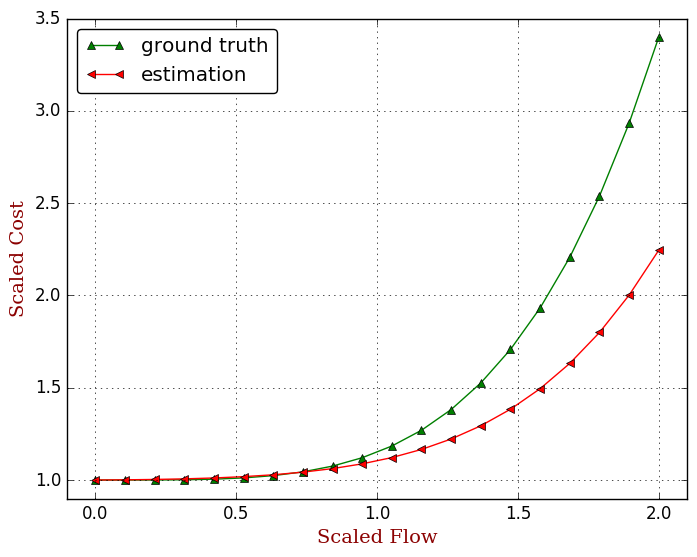

In [38]:
using PyPlot

iterN = 2

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "^-g", label="ground truth")
plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Anaheim_iter_$(iterN)_multi_class.pdf")

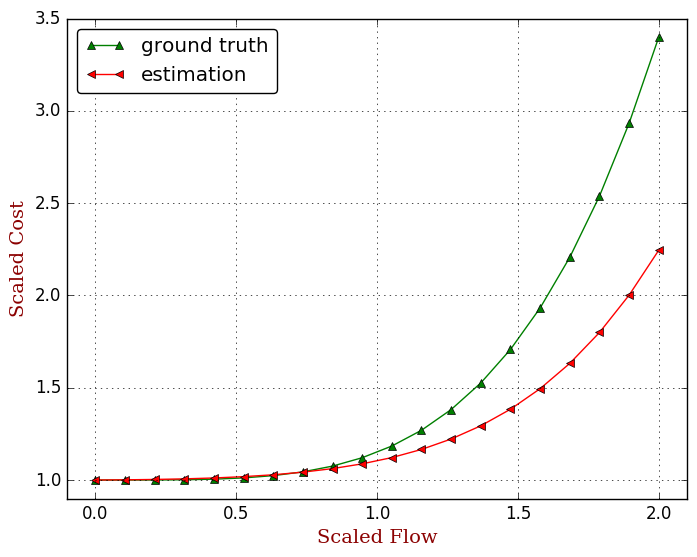

In [39]:
using PyPlot

iterN = 3

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "^-g", label="ground truth")
plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Anaheim_iter_$(iterN)_multi_class.pdf")

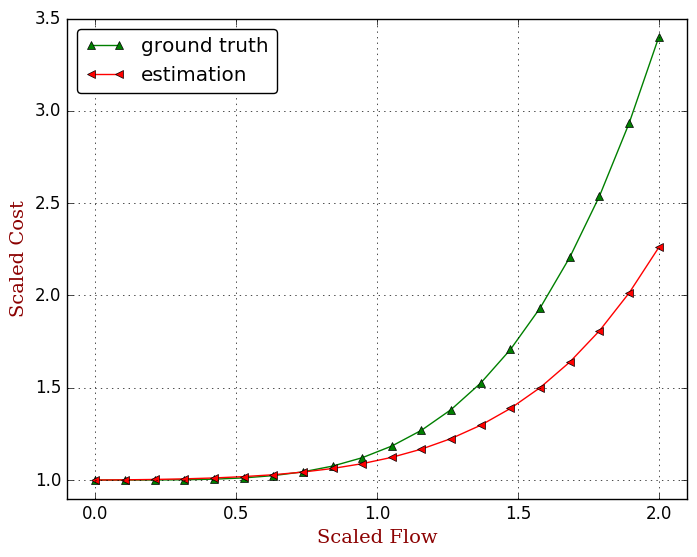

In [40]:
using PyPlot

iterN = length(coeffs_dict)

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "^-g", label="ground truth")
plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Anaheim_iter_$(iterN)_multi_class.pdf")

In [41]:
objFunDict

Dict{Any,Any} with 7 entries:
  7 => 3.048284285076598e7
  4 => 3.1491768612423733e7
  2 => 5.306080917959063e7
  3 => 3.1576576270106047e7
  5 => 3.087546622877375e7
  6 => 3.048284285076598e7
  1 => 5.4701435215204895e7

In [42]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [43]:
outfile = open("./results/demandsDiffDictCar.json", "w")

JSON.print(outfile, demandsDiffDictCar)

close(outfile)

In [44]:
outfile = open("./results/demandsDiffDictTruck.json", "w")

JSON.print(outfile, demandsDiffDictTruck)

close(outfile)

In [45]:
outfile = open("./results/objInvVIDict.json", "w")

JSON.print(outfile, objInvVIDict)

close(outfile)

In [46]:
outfile = open("./results/coeffs_dict.json", "w")

JSON.print(outfile, coeffs_dict)

close(outfile)

In [47]:
outfile = open("./results/demandsVecDictCar.json", "w")

JSON.print(outfile, demandsVecDictCar)

close(outfile)

In [48]:
outfile = open("./results/demandsVecDictTruck.json", "w")

JSON.print(outfile, demandsVecDictTruck)

close(outfile)

In [49]:
outfile = open("./results/demandsDictCar.json", "w")

JSON.print(outfile, demandsDictCar)

close(outfile)

In [50]:
outfile = open("./results/demandsDictTruck.json", "w")

JSON.print(outfile, demandsDictTruck)

close(outfile)

In [51]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [52]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)